In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt 

import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm 

/Users/jacobblum/anaconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/jacobblum/anaconda3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: /Users/jacobblum/anaconda3/lib/python3.10/site-packages/torchvision/image.so
  Expected in: /Users/jacobblum/anaconda3/lib/python3.10/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize((0.5,), (0.5,)),
                              ])


trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform= transform)

In [4]:
X_train = trainset.data.float()
y_train = trainset.targets.float()

X_test = testset.data.float()
y_test = testset.targets.float()


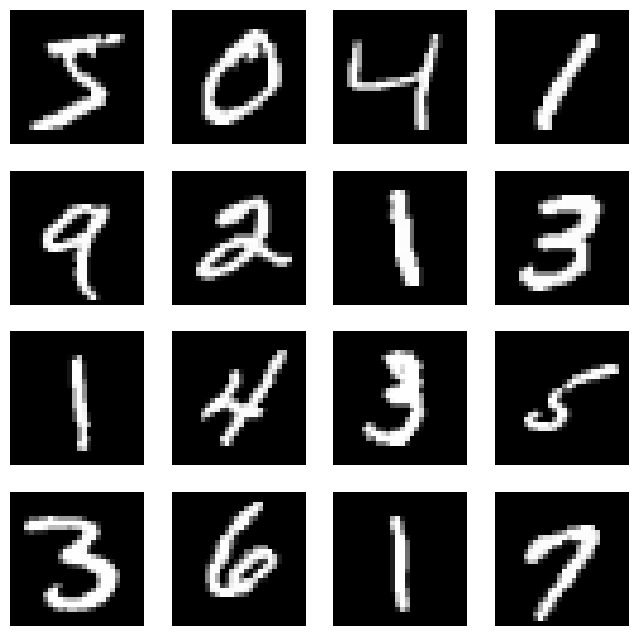

In [5]:
#Lets Check to see what the data looks like 

fig, axs = plt.subplots(4,4, figsize = (8,8))
for inx, ax in enumerate(axs.flatten()):
    ax.imshow(X_train[inx, :, :], cmap = 'gray')
    ax.axis('off')

In [6]:
# We need to know the shape of our inputs!

print(X_train[0,:,:].shape)

torch.Size([28, 28])


In [7]:
# Now let's define our network 



# Activation Function: ReLU

class CNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.conv01 = nn.Conv2d(1, 32, kernel_size = 5)
        self.conv02 = nn.Conv2d(32, 32, kernel_size = 5)
        self.conv03 = nn.Conv2d(32, 64, kernel_size = 5)
        
        self.fc01 = nn.Linear(3*3*64, 256)
        self.fc02 = nn.Linear(256, 10)
        
        self.relu = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.out_act = nn.LogSoftmax(dim = 1)
    
        
    def forward(self, x):
        x = self.relu(self.conv01(x))
        x = self.relu(self.maxpool2(self.conv02(x)))
        x = self.relu(self.maxpool2(self.conv03(x)))
        x = x.view(-1, 3*3*64)
        x = self.relu(self.fc01(x))
        x = self.fc02(x)
        return self.out_act(x)
        
        
# CNN expects inputs in the shape [N_batches, N_channels, height, width] = [Nb, 1, 28, 28] ! 


In [9]:
# Plot the Networks initial Guesses

f = CNN()

guesses = []
for i in range(8):
    guesses.append(torch.argmax(f( (X_train[i, :,:]).reshape(1,1,28,28))))
    print('the network guessed that the {}th image was: {}, the correct answer is: {}'.format(i, guesses[i], y_train[i]))

    
guesses = torch.FloatTensor(guesses)
print('accuracy = {} %'.format((guesses == y_train[0:8]).sum() / len(guesses) )) 




the network guessed that the 0th image was: 2, the correct answer is: 5.0
the network guessed that the 1th image was: 2, the correct answer is: 0.0
the network guessed that the 2th image was: 2, the correct answer is: 4.0
the network guessed that the 3th image was: 6, the correct answer is: 1.0
the network guessed that the 4th image was: 2, the correct answer is: 9.0
the network guessed that the 5th image was: 6, the correct answer is: 2.0
the network guessed that the 6th image was: 0, the correct answer is: 1.0
the network guessed that the 7th image was: 2, the correct answer is: 3.0
accuracy = 0.0 %


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


In [10]:
from tqdm.notebook import tqdm

f = CNN()

batch_size = 64
N_epochs = 10
optimizer = optim.Adam(f.parameters(), lr = 1e-3 )
lfn = nn.CrossEntropyLoss()

trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)

loss_list = []

for epoch in tqdm(range(N_epochs), desc = 'training neural network'):
    for images, labels in tqdm(trainloader):
        optimizer.zero_grad()
        pred_labels = f(images)
        loss = lfn(pred_labels, labels)
        loss.backward()
        optimizer.step()
        loss_list.append(loss)

training neural network:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

In [11]:
# Let's check the accuracy now 
N_examples = 250

guesses = []
for i in range(N_examples):
    guesses.append(torch.argmax(f( (X_train[i, :,:]).reshape(1,1,28,28))))
    #print('the network guessed that the {}th image was: {}, the correct answer is: {}'.format(i, guesses[i], y_test[i]))
    
guesses = torch.FloatTensor(guesses)
print('accuracy over {} random test samples = {} %'.format(N_examples, (guesses == y_train[0:N_examples]).sum() / len(guesses) )) 

# 96 %, pretty good ! 

accuracy over 250 random test samples = 0.9919999837875366 %
